<a href="https://colab.research.google.com/github/ataberkkoroglu/Global-ai-project/blob/master/Melbourne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
sns.set(rc={'figure.figsize':(10,10)})
pd.set_option('display.max_columns',500)
pd.set_option('display.max_row',500)
pd.set_option('display.width', 1000)

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
df.shape

(34857, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
cat_col=df.select_dtypes("object")
for i in cat_col:
  df[i]=df[i].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

In [9]:
num_but_cat=[col for col in df.select_dtypes(["int","float"]) if df[col].nunique() > 10 and df[col].nunique() <20 and df[col].dtypes != "O"]
cat_but_card=[col for col in df.select_dtypes("category") if df[col].nunique()>20]
print(cat_col.columns)
cat_col=[col for col in cat_col if col not in cat_but_card]
num_but_cat,cat_but_card,cat_col

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'], dtype='object')


(['Rooms', 'Bedroom2', 'Bathroom', 'Car'],
 ['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea'],
 ['Type', 'Method', 'Regionname'])

In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(34856, 21)

In [12]:
df[df['Price'].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,3.0,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34829,West Melbourne,9/11 Anderson St,3,u,NaN,S,hockingstuart,24/02/2018,3.1,3003.0,NaN,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,2230.0
34834,Wheelers Hill,112 Jells Rd,4,h,NaN,PN,Harcourts,24/02/2018,16.7,3150.0,4.0,2.0,2.0,714.0,NaN,NaN,Monash City Council,-37.90287,145.19011,South-Eastern Metropolitan,7392.0
34835,Wheelers Hill,20 Mill Ct,3,h,NaN,S,Barry,24/02/2018,16.7,3150.0,3.0,2.0,2.0,677.0,NaN,NaN,Monash City Council,-37.91905,145.19105,South-Eastern Metropolitan,7392.0
34845,Windsor,13 Mary St,4,h,NaN,W,Jellis,24/02/2018,4.6,3181.0,4.0,3.0,2.0,279.0,237.0,2009.0,Port Phillip City Council,-37.85418,144.99697,Southern Metropolitan,4380.0


In [13]:
suburb_col = df['Suburb'].unique()

for col in suburb_col:
    mask = (df['Suburb'] == col) & (df['Price'].isna())
    mean = df[(df['Suburb'] == col) & ~df['Price'].isna()]['Price'].mean()
    df.loc[mask, 'Price'] = mean
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                6
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [14]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['BuildingArea'].isna())
    mean = df[(df['Suburb'] == col) & ~df['BuildingArea'].isna()]['BuildingArea'].mean()
    df.loc[mask, 'BuildingArea'] = mean

df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                6
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea       123
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [15]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['Landsize'].isna())
    mean = df[(df['Suburb'] == col) & ~df['Landsize'].isna()]['Landsize'].mean()
    df.loc[mask, 'Landsize'] = mean

df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                6
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize            99
BuildingArea       123
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [16]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['Lattitude'].isna())
    mean = df[(df['Suburb'] == col) & ~df['Lattitude'].isna()]['Lattitude'].mean()
    df.loc[mask, 'Lattitude'] = mean

df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                6
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize            99
BuildingArea       123
YearBuilt        19306
CouncilArea          3
Lattitude           88
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [17]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['Longtitude'].isna())
    mean = df[(df['Suburb'] == col) & ~df['Longtitude'].isna()]['Longtitude'].mean()
    df.loc[mask, 'Longtitude'] = mean

df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                6
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize            99
BuildingArea       123
YearBuilt        19306
CouncilArea          3
Lattitude           88
Longtitude          88
Regionname           3
Propertycount        3
dtype: int64

In [18]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['Bedroom2'].isna())
    min = df[(df['Suburb'] == col) & ~df['Bedroom2'].isna()]['Bedroom2'].min()
    df.loc[mask, 'Bedroom2'] = min

df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                6
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2            88
Bathroom          8226
Car               8728
Landsize            99
BuildingArea       123
YearBuilt        19306
CouncilArea          3
Lattitude           88
Longtitude          88
Regionname           3
Propertycount        3
dtype: int64

In [19]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['YearBuilt'].isna())
    min = df[(df['Suburb'] == col) & ~df['YearBuilt'].isna()]['YearBuilt'].min()
    df.loc[mask, 'YearBuilt'] = min

df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               6
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2           88
Bathroom         8226
Car              8728
Landsize           99
BuildingArea      123
YearBuilt         122
CouncilArea         3
Lattitude          88
Longtitude         88
Regionname          3
Propertycount       3
dtype: int64

In [20]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['Bathroom'].isna())
    min = df[(df['Suburb'] == col) & ~df['Bathroom'].isna()]['Bathroom'].min()
    df.loc[mask, 'Bathroom'] = min

df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               6
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2           88
Bathroom           88
Car              8728
Landsize           99
BuildingArea      123
YearBuilt         122
CouncilArea         3
Lattitude          88
Longtitude         88
Regionname          3
Propertycount       3
dtype: int64

In [21]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['Car'].isna())
    min = df[(df['Suburb'] == col) & ~df['Car'].isna()]['Car'].min()
    df.loc[mask, 'Car'] = min

df.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              6
Method             0
SellerG            0
Date               0
Distance           1
Postcode           1
Bedroom2          88
Bathroom          88
Car               89
Landsize          99
BuildingArea     123
YearBuilt        122
CouncilArea        3
Lattitude         88
Longtitude        88
Regionname         3
Propertycount      3
dtype: int64

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.031013e+00,0.969947,1.00000,2.000000,3.00000,4.000000e+00,1.600000e+01
Price,34850.0,1.076458e+06,601250.440507,85000.00000,667000.000000,926926.15082,1.325000e+06,1.120000e+07
Distance,34855.0,1.118481e+01,6.788952,0.00000,6.400000,10.30000,1.400000e+01,4.810000e+01
Postcode,34855.0,3.116062e+03,109.025437,3000.00000,3051.000000,3103.00000,3.156000e+03,3.978000e+03
Bedroom2,34768.0,2.653503e+00,1.214489,0.00000,2.000000,3.00000,3.000000e+00,3.000000e+01
Bathroom,34768.0,1.425276e+00,0.758910,0.00000,1.000000,1.00000,2.000000e+00,1.200000e+01
Car,34767.0,1.335203e+00,1.127182,0.00000,0.000000,1.00000,2.000000e+00,2.600000e+01
Landsize,34757.0,5.918291e+02,2823.310045,0.00000,325.636364,530.75873,6.533333e+02,4.330140e+05
BuildingArea,34733.0,1.600897e+02,289.290896,0.00000,120.000000,146.70160,1.860912e+02,4.451500e+04
YearBuilt,34734.0,1.931990e+03,67.830034,1196.00000,1890.000000,1940.00000,1.970000e+03,2.106000e+03


##Outlier Detection

13


<Axes: xlabel='Rooms'>

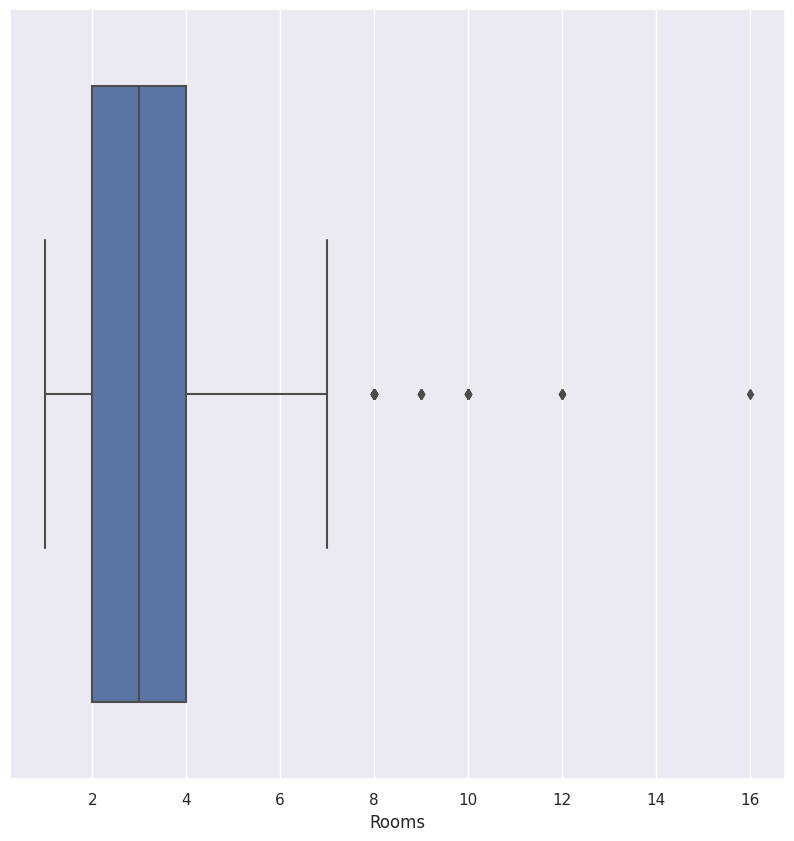

In [23]:
outlier_col=df.select_dtypes(['int','float']).columns
print(len(outlier_col))
sns.boxplot(df,x=outlier_col[0])

<Axes: xlabel='Price'>

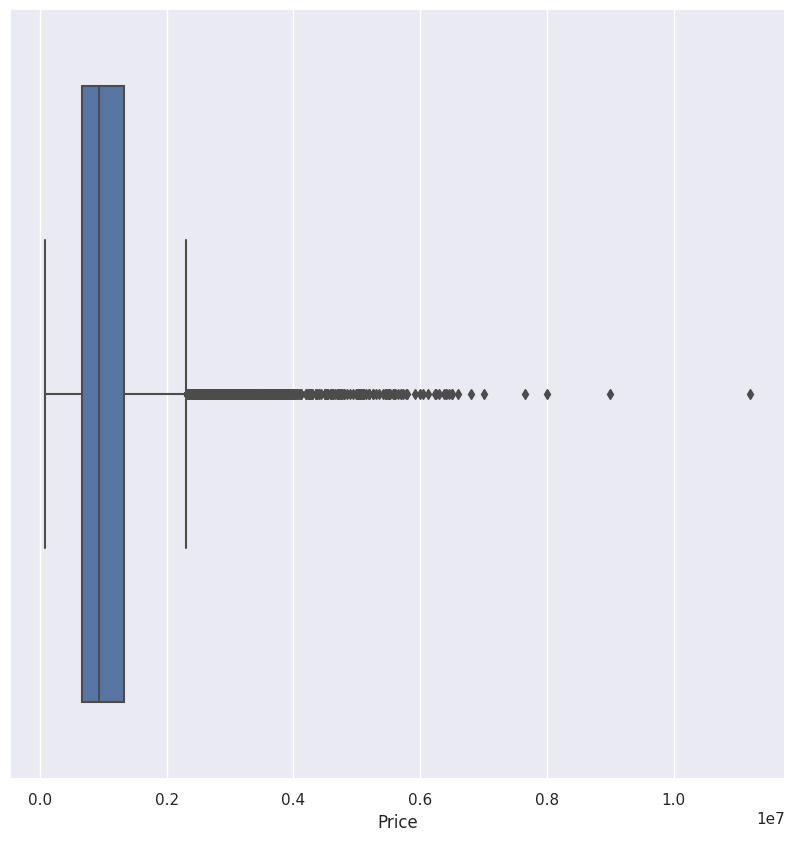

In [24]:
sns.boxplot(df,x=outlier_col[1])

<Axes: xlabel='Distance'>

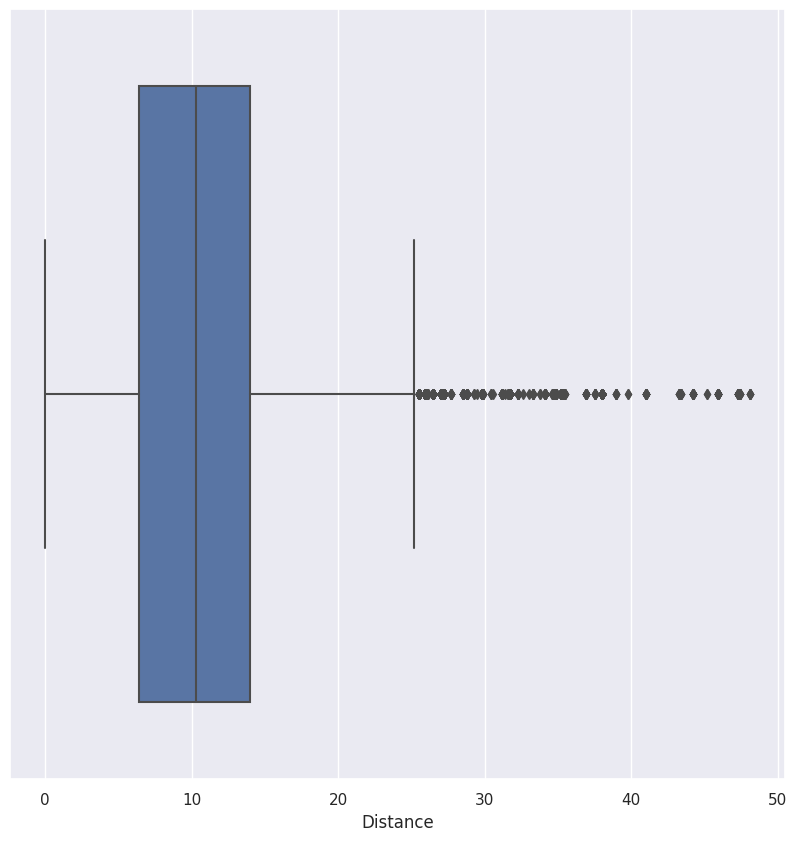

In [25]:
sns.boxplot(df,x=outlier_col[2])

<Axes: xlabel='Postcode'>

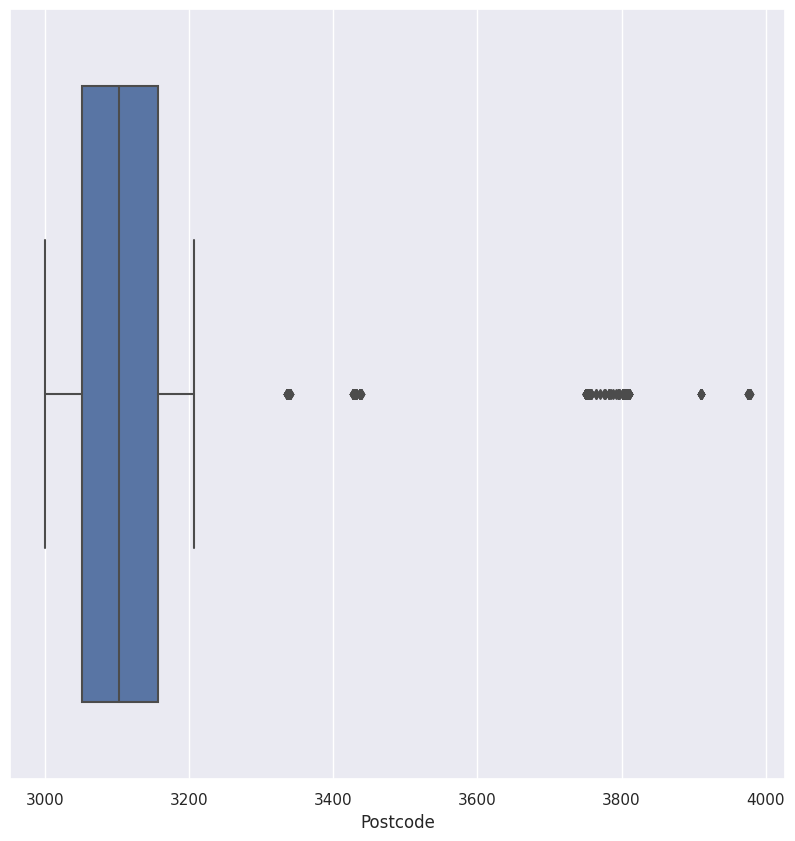

In [26]:
sns.boxplot(df,x=outlier_col[3])

<Axes: xlabel='Bedroom2'>

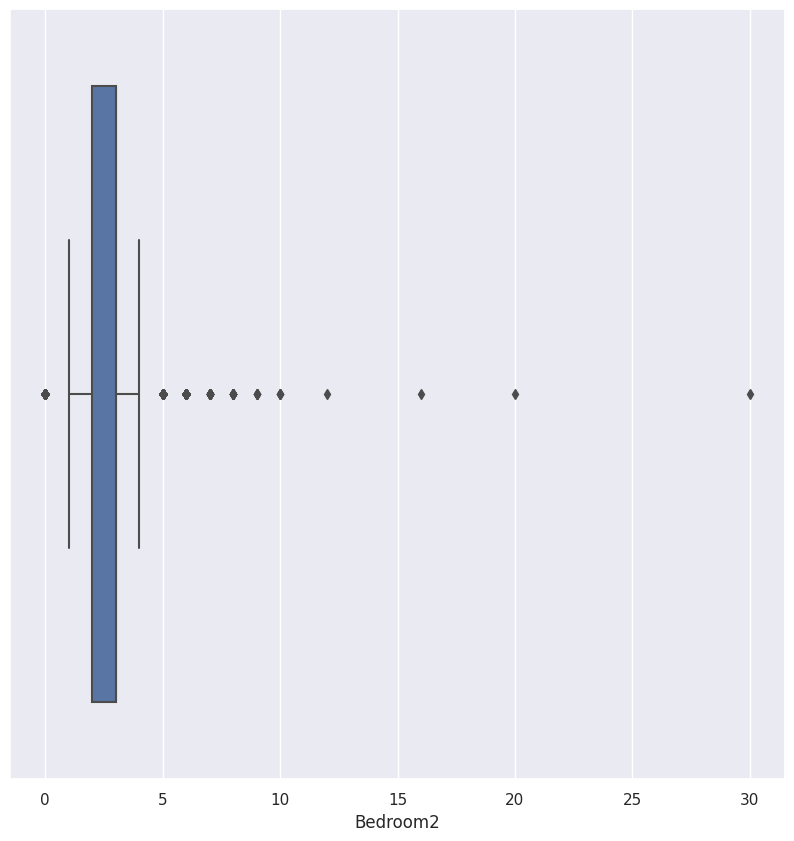

In [27]:
sns.boxplot(df,x=outlier_col[4])

<Axes: xlabel='Bathroom'>

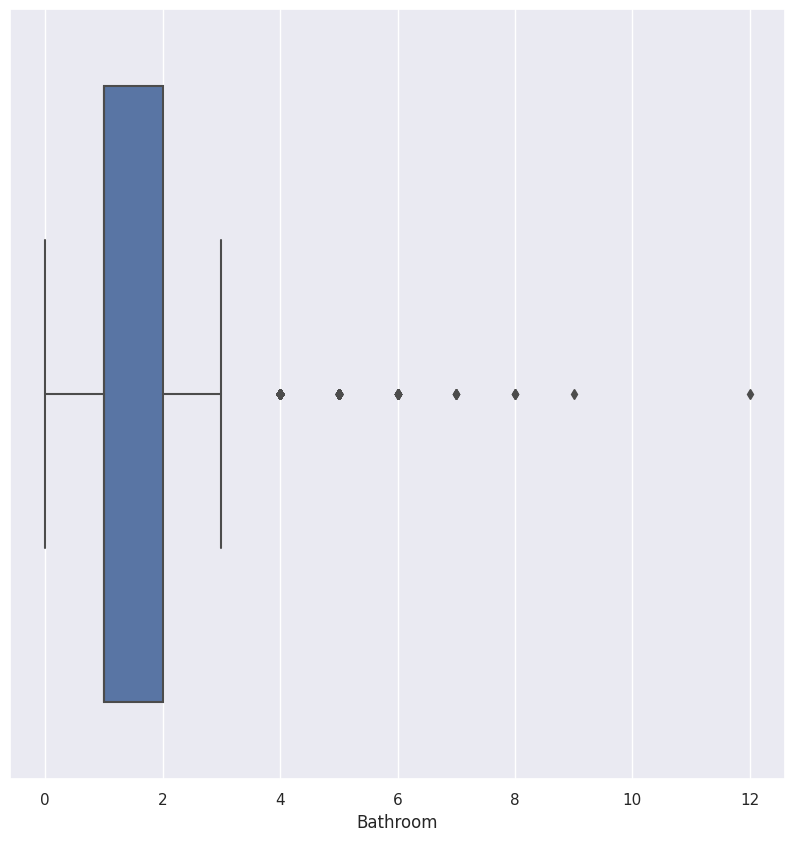

In [28]:
sns.boxplot(df,x=outlier_col[5])

<Axes: xlabel='Car'>

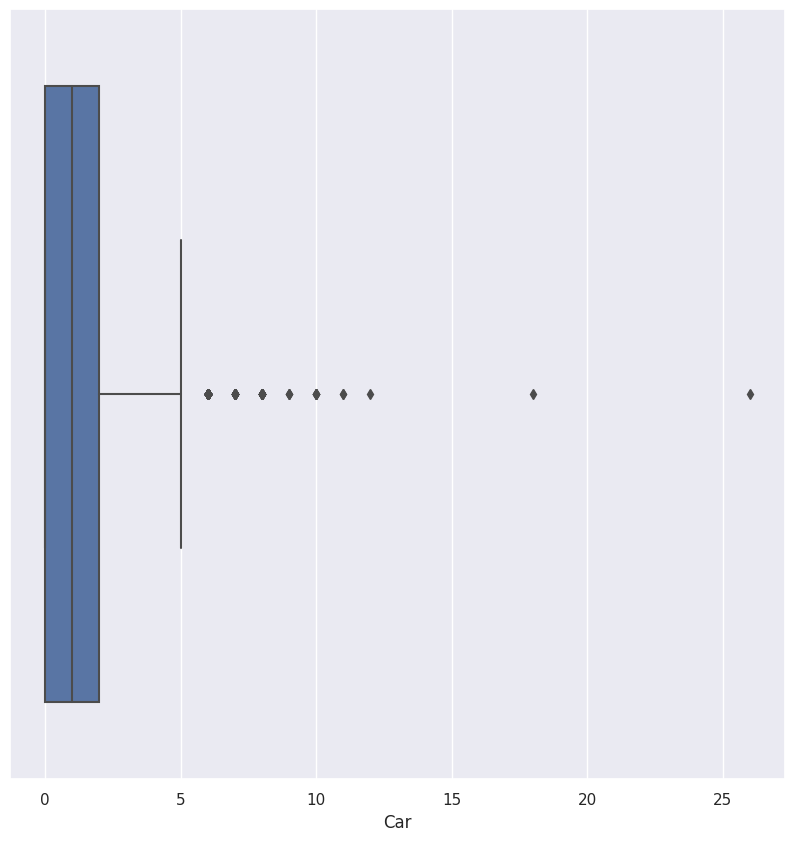

In [29]:
sns.boxplot(df,x=outlier_col[6])

<Axes: xlabel='Landsize'>

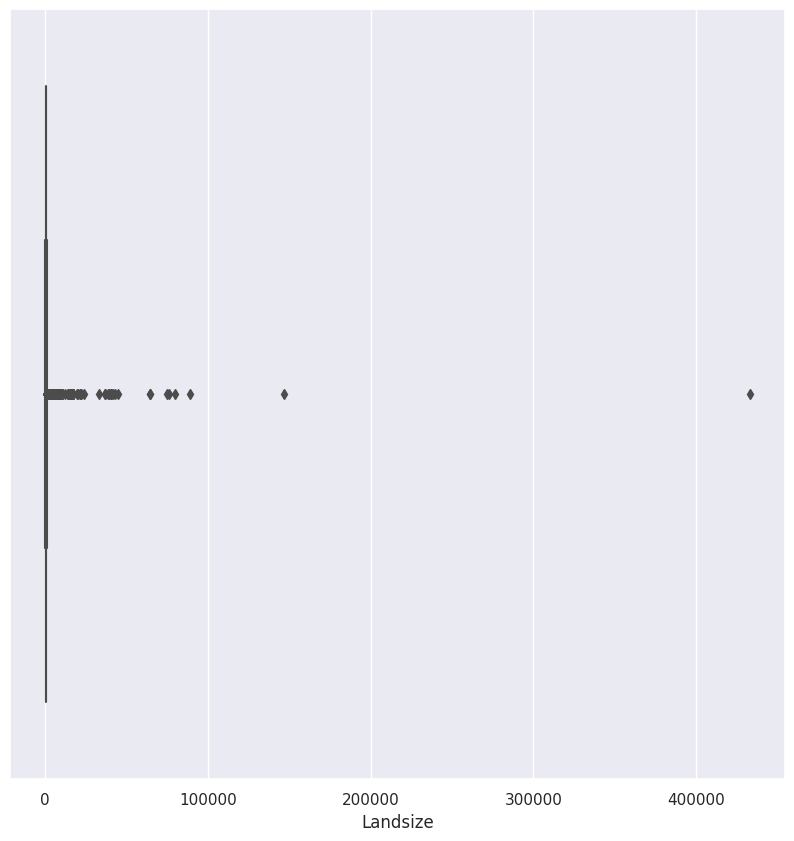

In [30]:
sns.boxplot(df,x=outlier_col[7])

<Axes: xlabel='BuildingArea'>

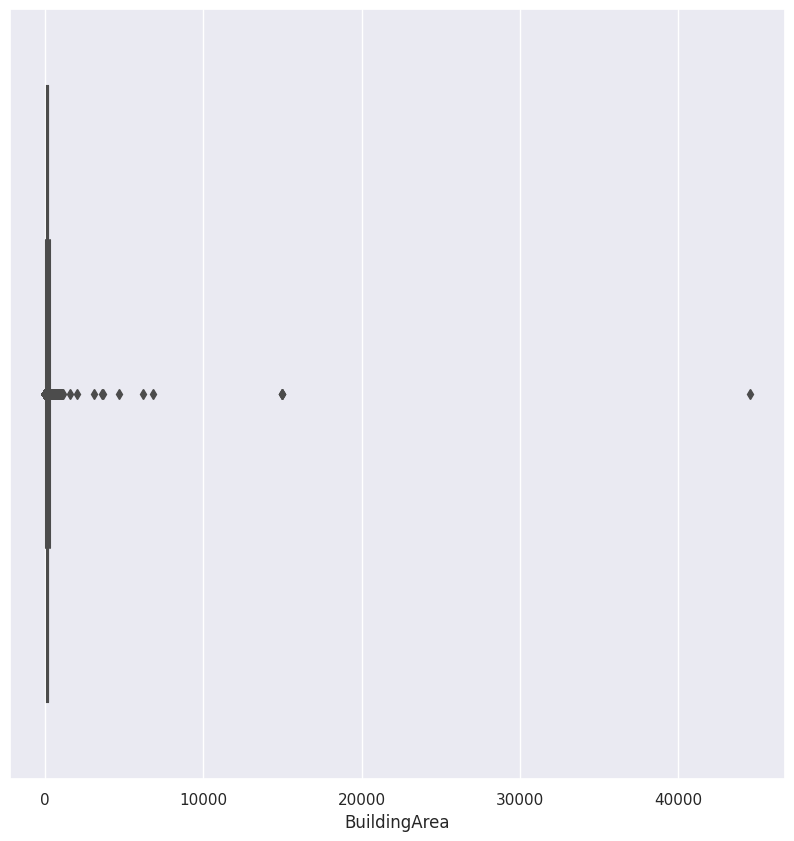

In [31]:
sns.boxplot(df,x=outlier_col[8])

<Axes: xlabel='YearBuilt'>

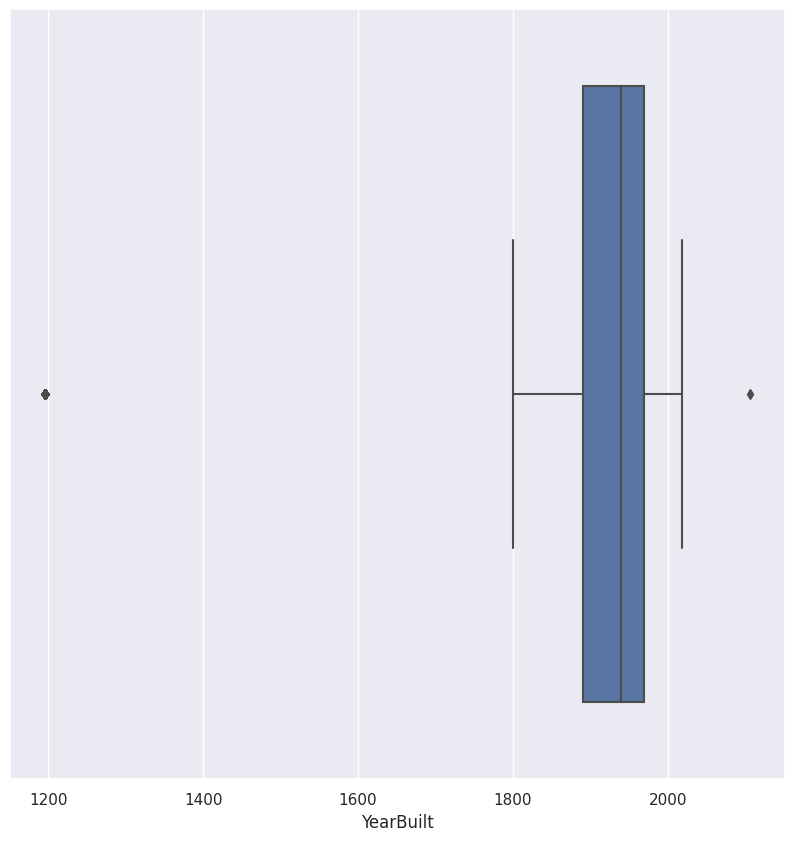

In [32]:
sns.boxplot(df,x=outlier_col[9])

<Axes: xlabel='Lattitude'>

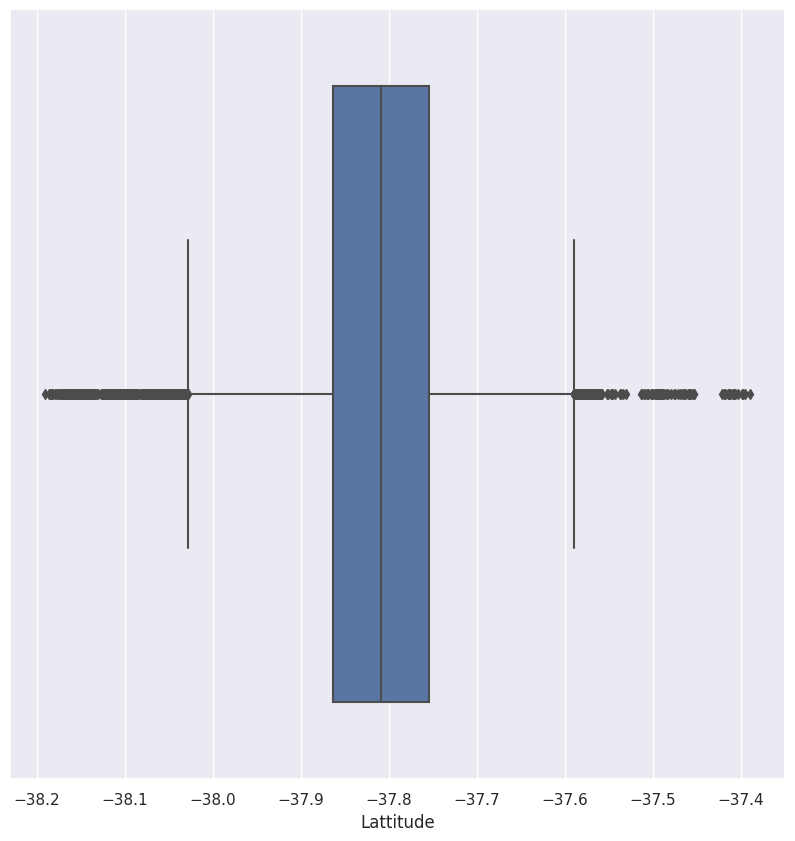

In [33]:
sns.boxplot(df,x=outlier_col[10])

<Axes: xlabel='Longtitude'>

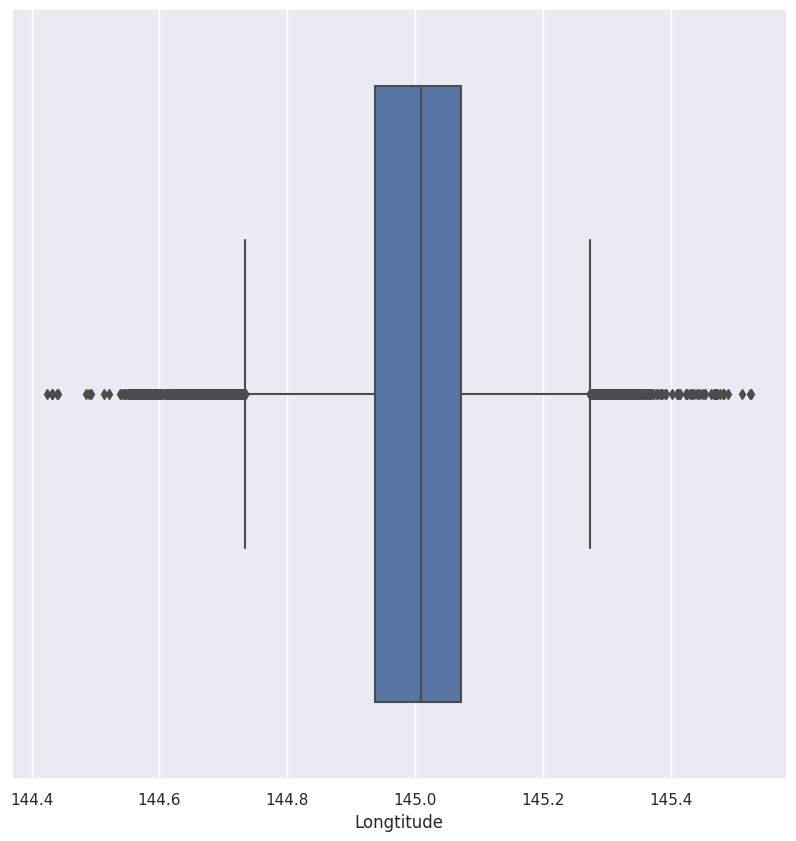

In [34]:
sns.boxplot(df,x=outlier_col[11])

<Axes: xlabel='Propertycount'>

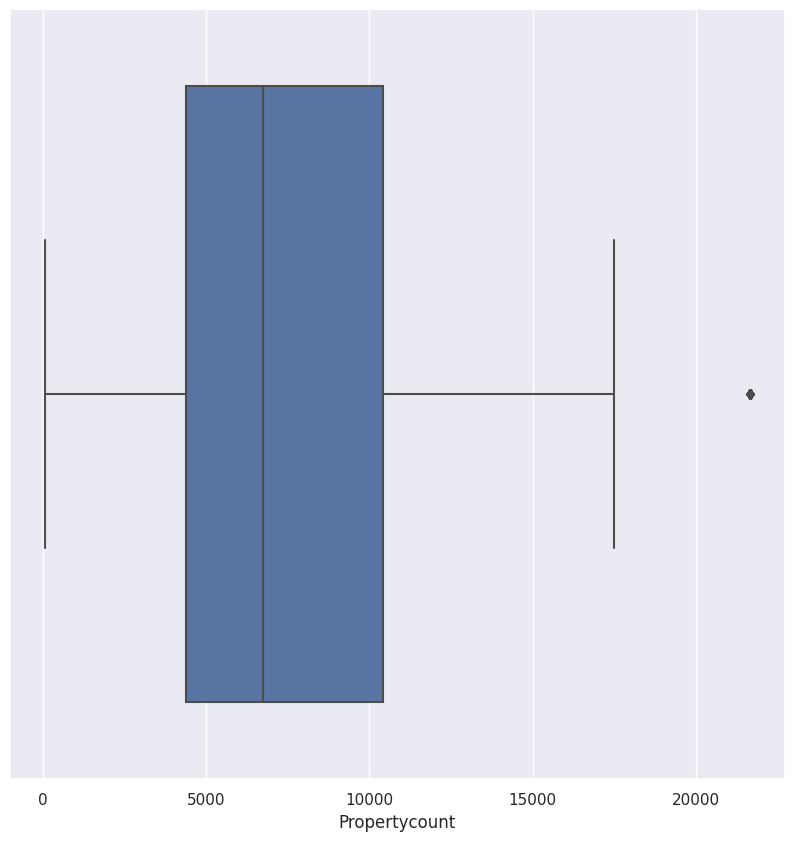

In [35]:
sns.boxplot(df,x=outlier_col[12])

In [36]:
#Outlier Detection
Threshold = 3

for col in df.select_dtypes(['int', 'float']):
    Z = np.abs((df[col] - df[col].mean()) / df[col].std())
    df[col] = np.where(Z > Threshold, np.nan, df[col])


In [37]:
for col in outlier_col:
  QIR=df[col].quantile(0.75)-df[col].quantile(0.25)
  lower=df[col].mean()-1.5*QIR
  upper=df[col].mean()+1.5*QIR
  print(f"Outlier Data {col} :{len(df[(df[col]>upper) | (df[col]<lower)])}")
  df=df[(df[col]<=upper) & (df[col]>=lower)]
  df[col].max(),upper

Outlier Data Rooms :0
Outlier Data Price :1575
Outlier Data Distance :1467
Outlier Data Postcode :0
Outlier Data Bedroom2 :7185
Outlier Data Bathroom :1091
Outlier Data Car :1716
Outlier Data Landsize :535
Outlier Data BuildingArea :892
Outlier Data YearBuilt :113
Outlier Data Lattitude :589
Outlier Data Longtitude :1006
Outlier Data Propertycount :993


<Axes: xlabel='Rooms'>

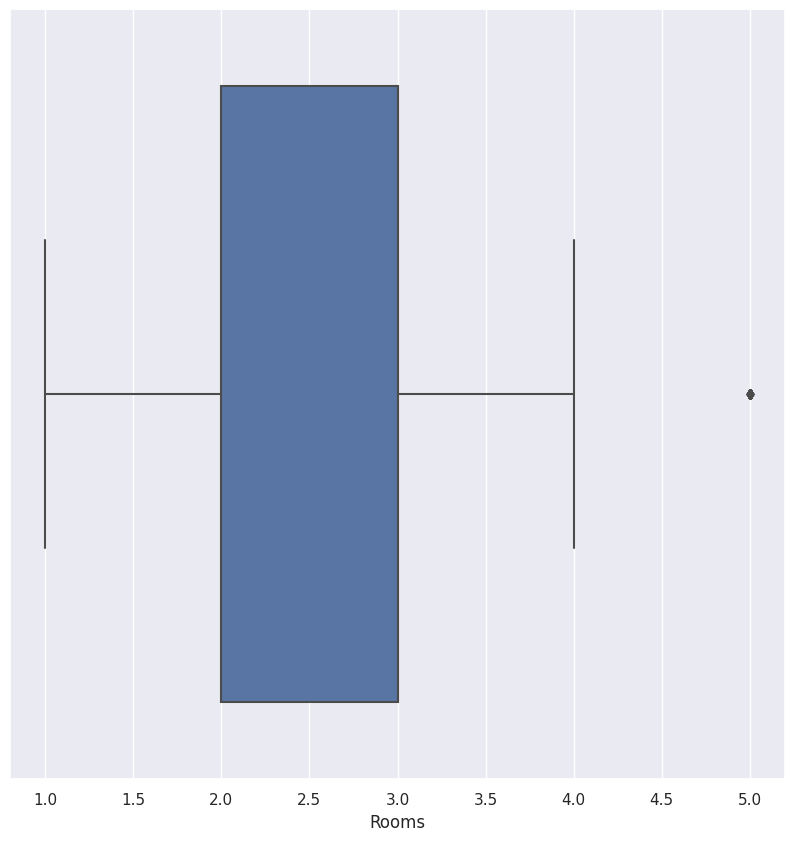

In [38]:
sns.boxplot(df,x=outlier_col[0])

<Axes: xlabel='Price'>

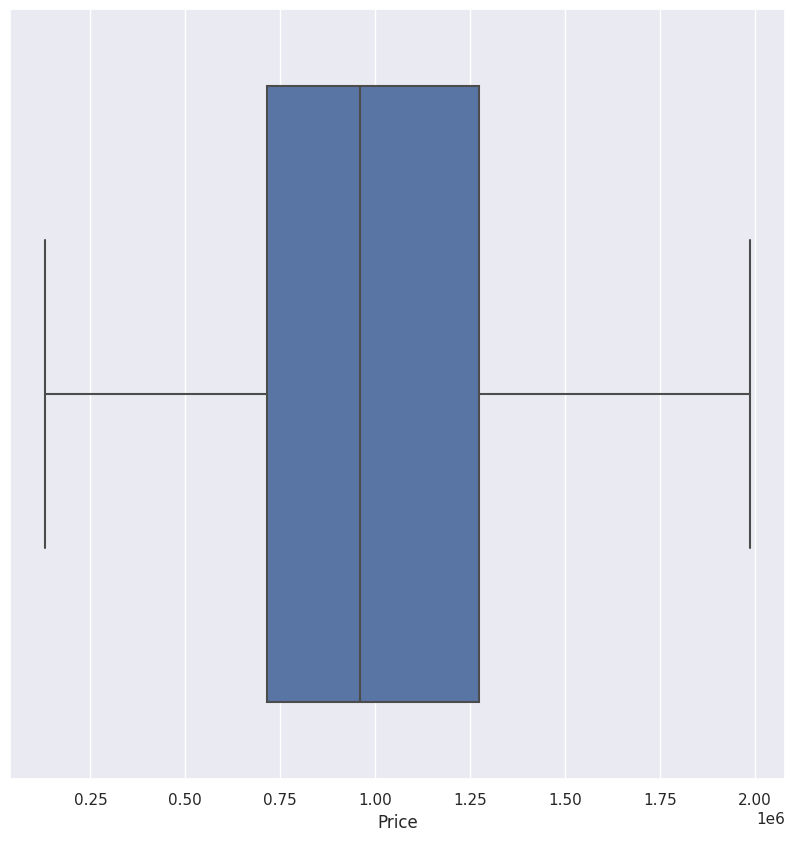

In [39]:
sns.boxplot(df,x=outlier_col[1])

<Axes: xlabel='Distance'>

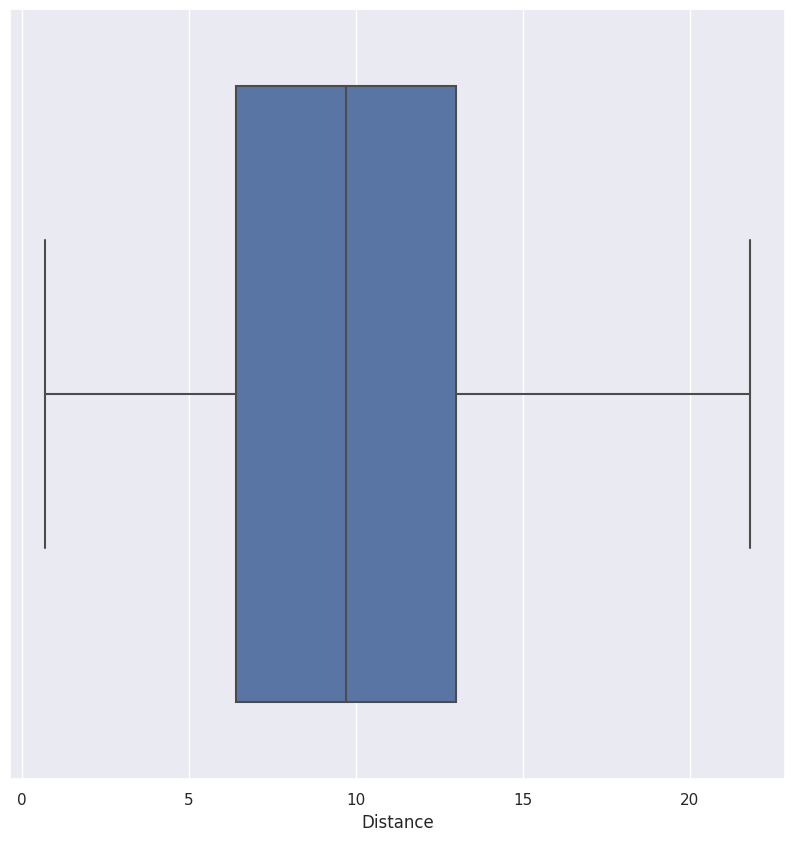

In [40]:
sns.boxplot(df,x=outlier_col[2])

<Axes: xlabel='Postcode'>

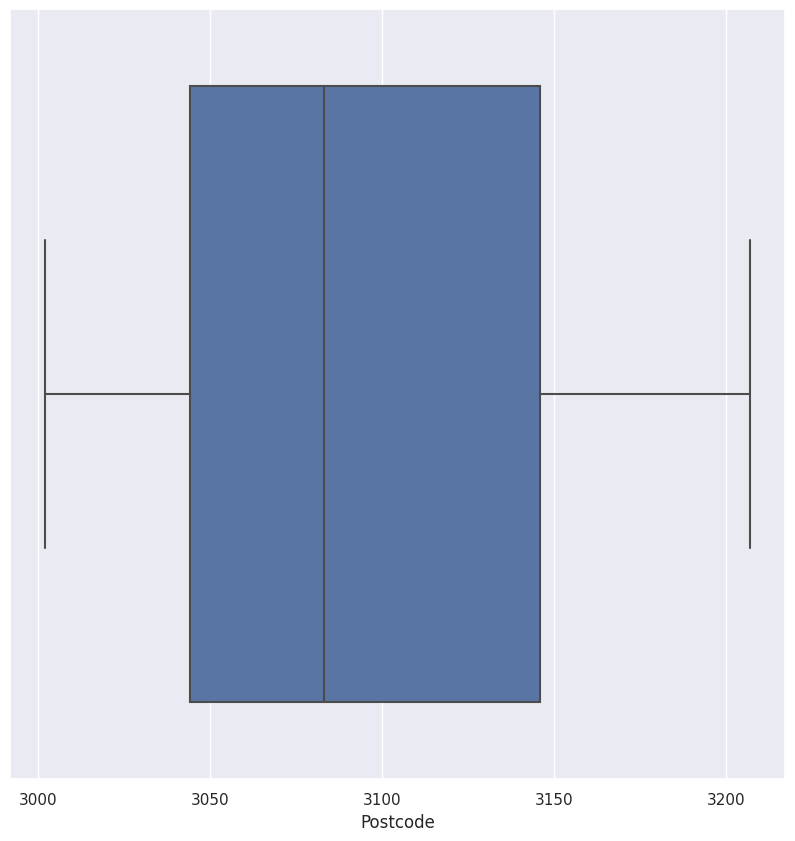

In [41]:
sns.boxplot(df,x=outlier_col[3])

<Axes: xlabel='Bedroom2'>

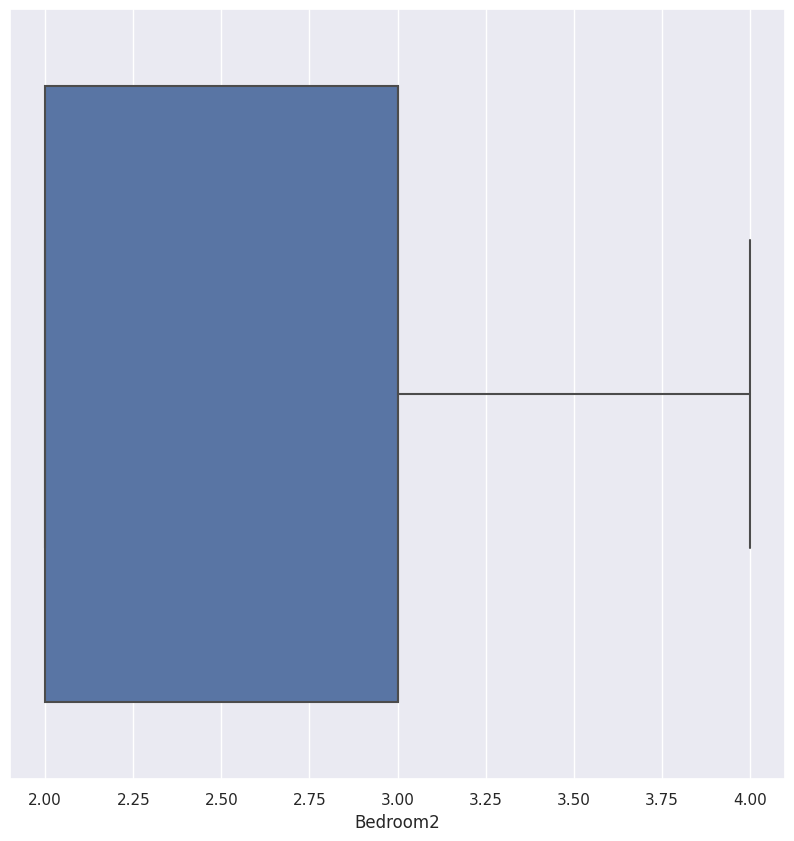

In [42]:
sns.boxplot(df,x=outlier_col[4])

<Axes: xlabel='Bathroom'>

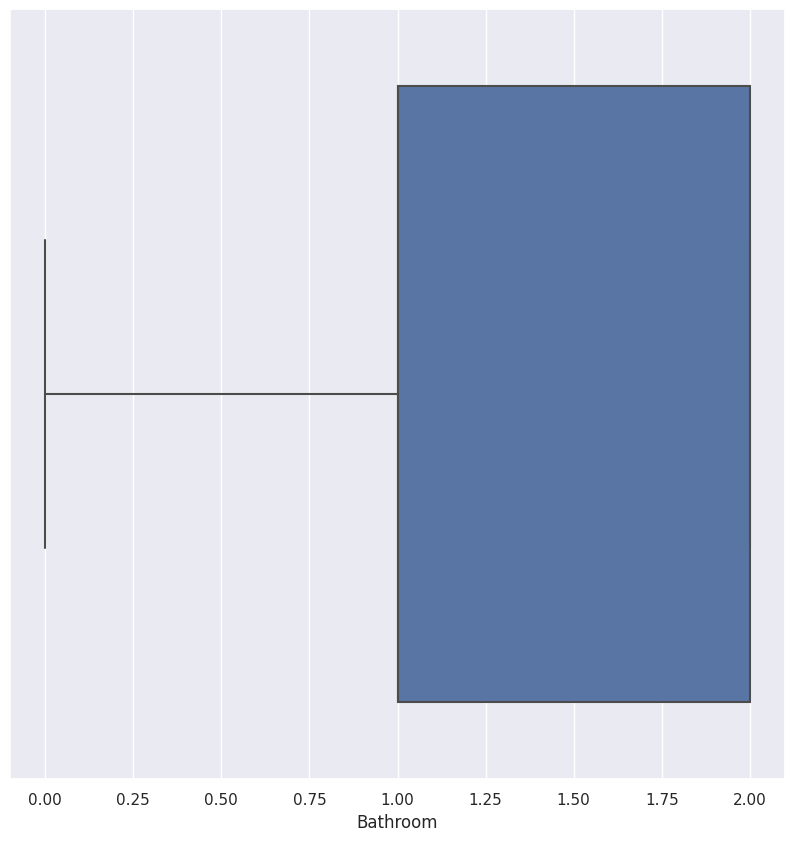

In [43]:
sns.boxplot(df,x=outlier_col[5])

<Axes: xlabel='Car'>

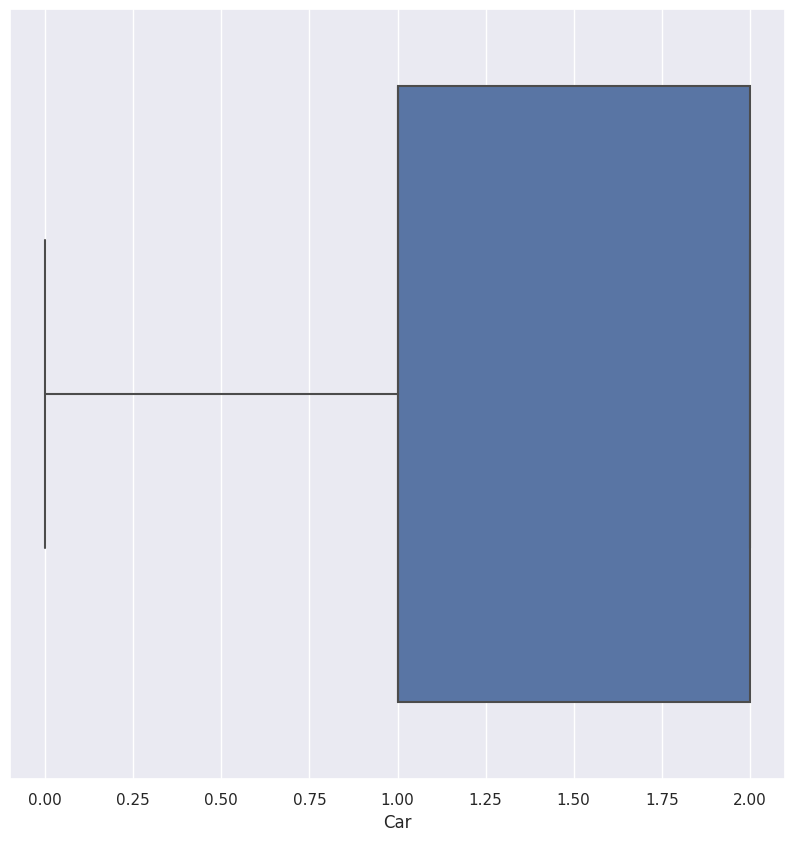

In [44]:
sns.boxplot(df,x=outlier_col[6])

<Axes: xlabel='Landsize'>

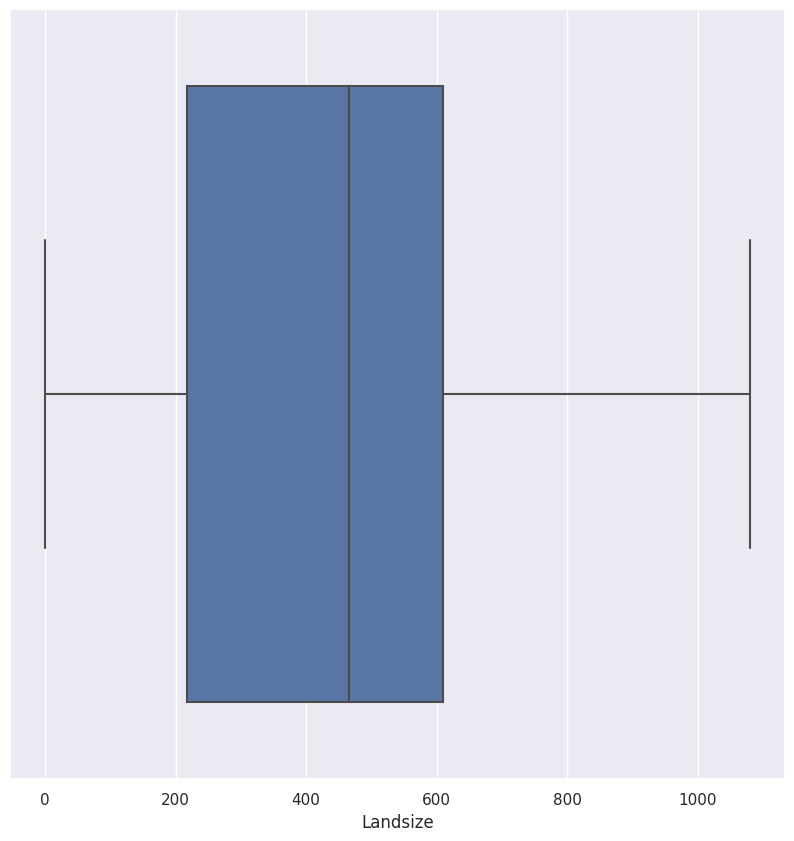

In [45]:
sns.boxplot(df,x=outlier_col[7])

<Axes: xlabel='BuildingArea'>

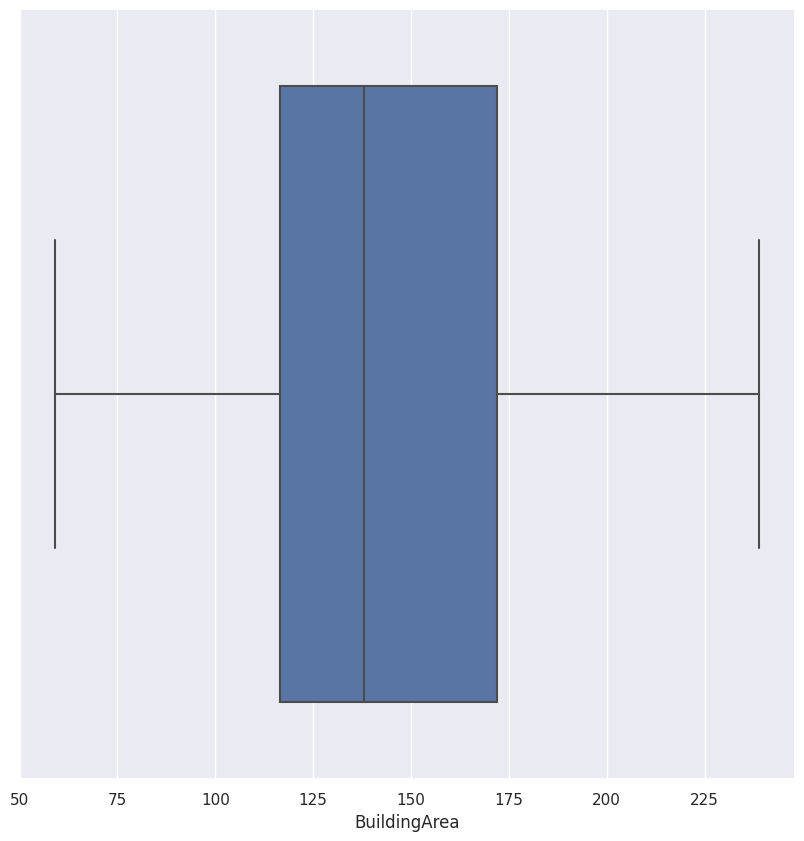

In [46]:
sns.boxplot(df,x=outlier_col[8])

<Axes: xlabel='YearBuilt'>

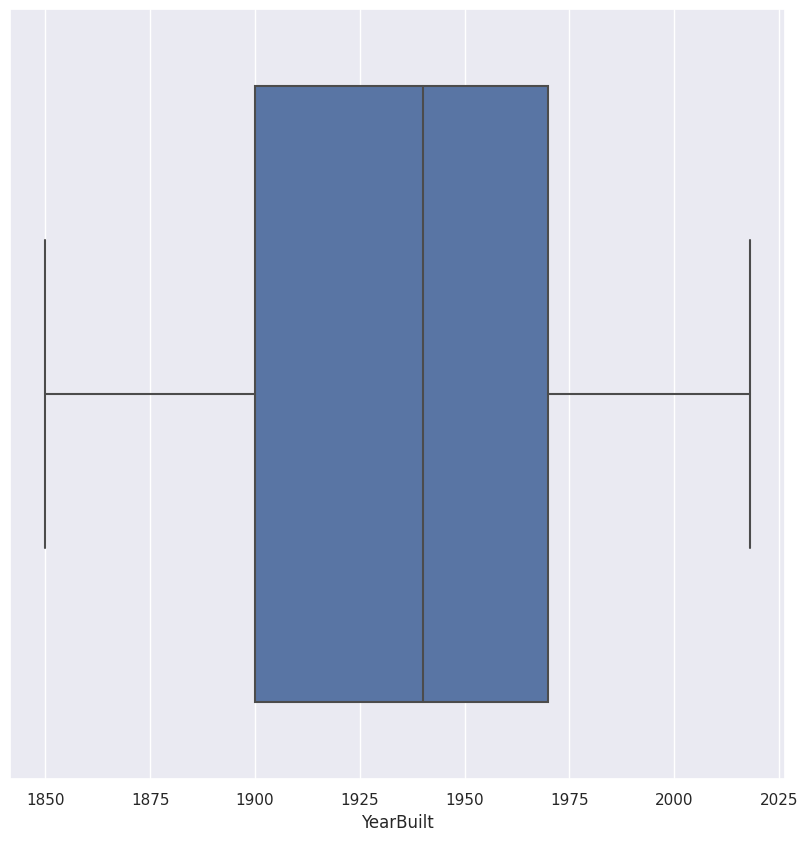

In [47]:
sns.boxplot(df,x=outlier_col[9])

<Axes: xlabel='Lattitude'>

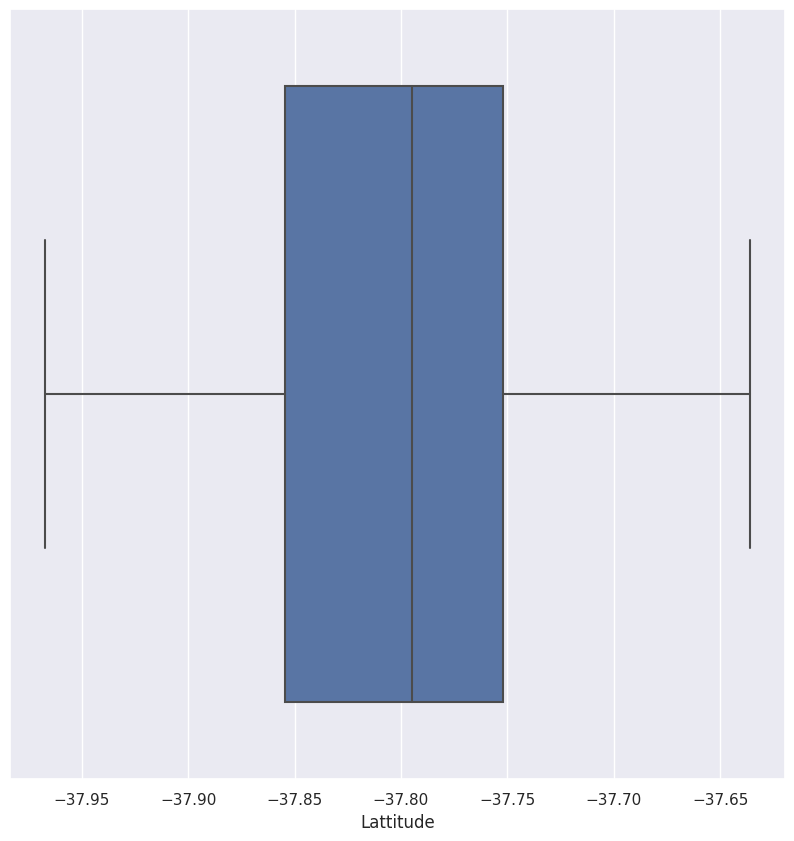

In [48]:
sns.boxplot(df,x=outlier_col[10])

<Axes: xlabel='Longtitude'>

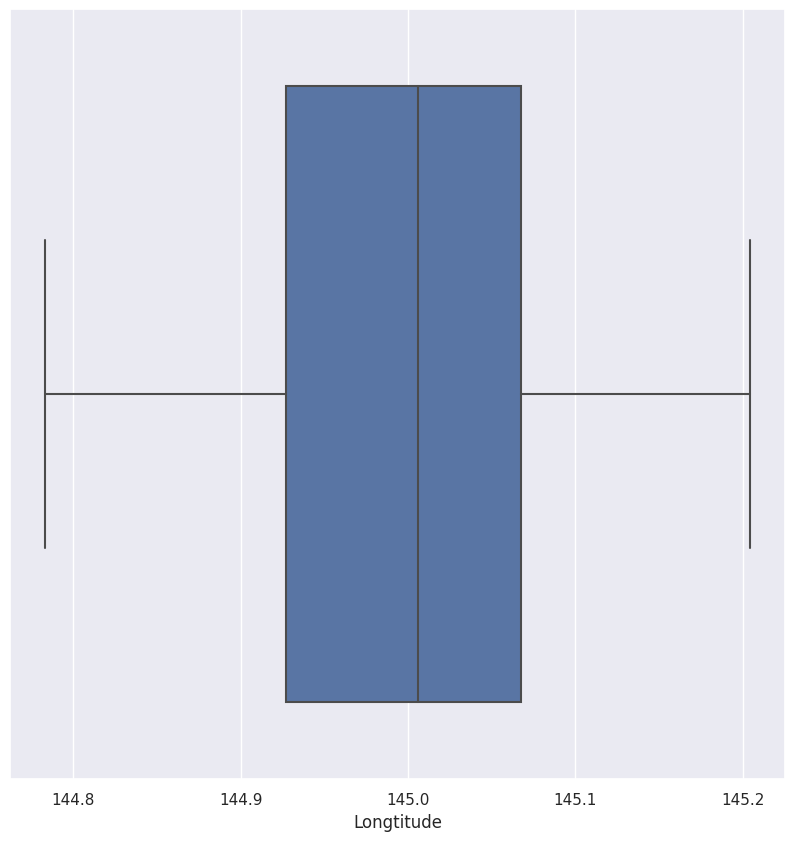

In [49]:
sns.boxplot(df,x=outlier_col[11])

<Axes: xlabel='Propertycount'>

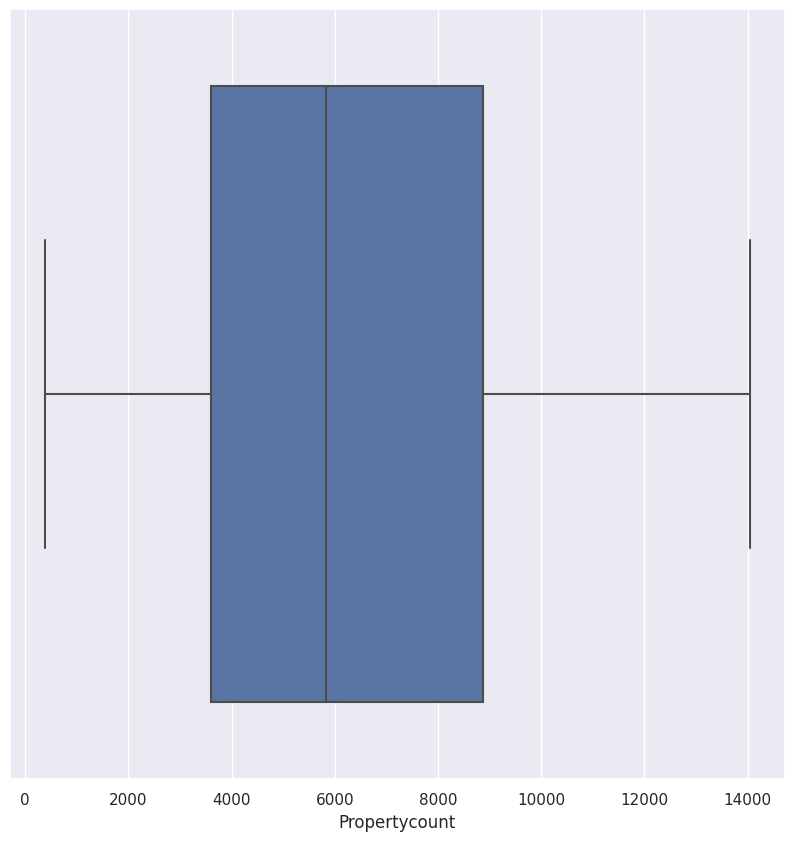

In [50]:
sns.boxplot(df,x=outlier_col[12])

<Axes: xlabel='Price', ylabel='Count'>

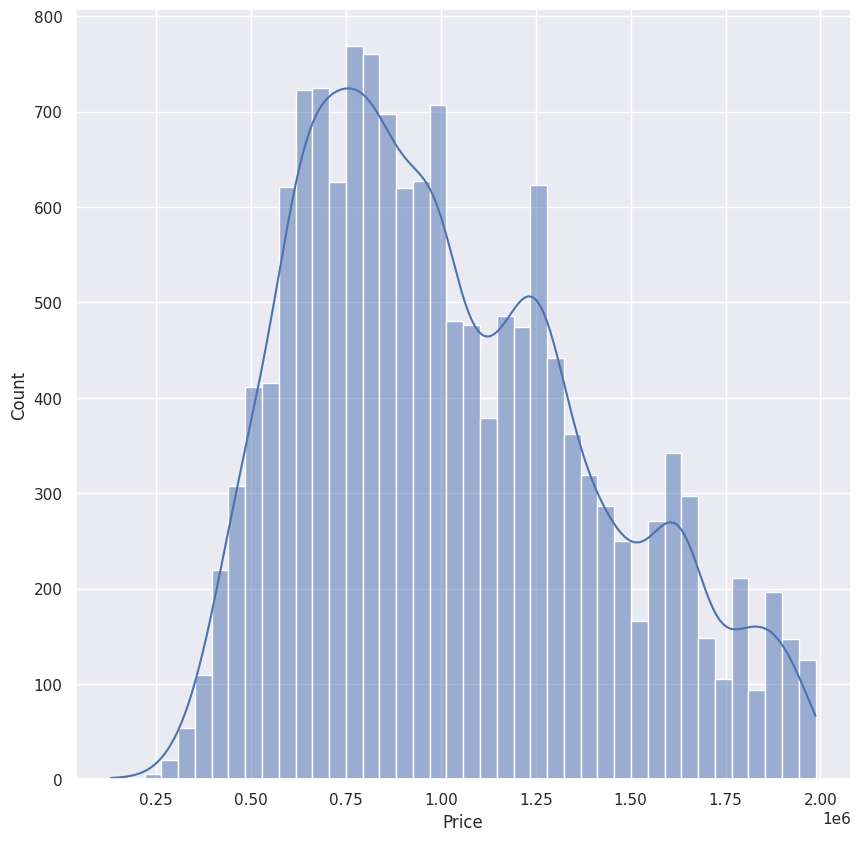

In [51]:
sns.histplot(data=df,x='Price',kde=True)

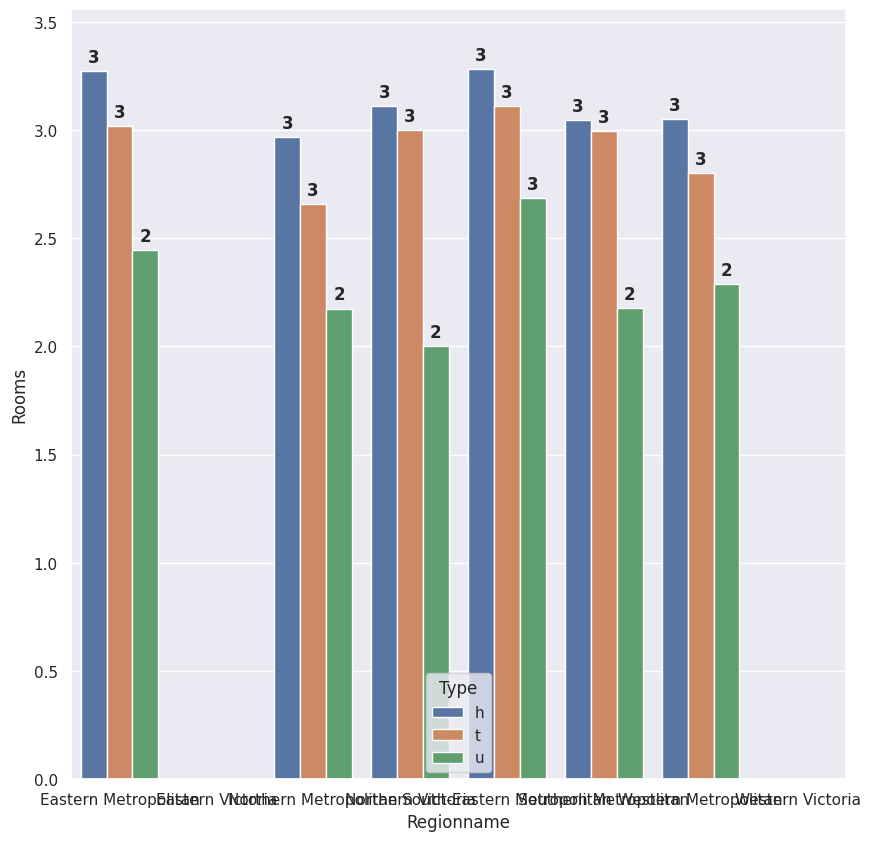

In [52]:
ax=sns.barplot(data=df,x='Regionname',y='Rooms',hue='Type',errwidth=0)
for p in ax.patches:
   ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0,10),
                textcoords = 'offset points',
                fontweight='bold')

In [ ]:
df2=df.select_dtypes(['int','float'])
sns.pairplot(data=df2,hue='Price')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
for col in cat_col:
  df[col]=encoder.fit_transform(df[col])

for col in cat_but_card:
    df[col]=encoder.fit_transform(df[col])

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=0,annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,LassoCV,RidgeCV,Lasso,ElasticNet,ElasticNetCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor,KernelDensity

In [ ]:
y=df['Price'].values
X=df.drop('Price',axis=1).values

In [ ]:
sc=MinMaxScaler()
X=sc.fit_transform(X)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape

In [ ]:
Y_train.shape,Y_test.shape

##Linear Regression

In [ ]:
lin_reg=LinearRegression().fit(X_train,Y_train)

In [ ]:
lin_reg.coef_

In [ ]:
lin_reg.intercept_

In [ ]:
Y_pred=lin_reg.predict(X_test)
lin_reg_result=mean_squared_error(Y_test,Y_pred)
lin_reg_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {lin_reg_result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {lin_reg_R2}")


In [ ]:
lin_reg_cv=np.mean(-cross_val_score(lin_reg,X_train,Y_train,cv=10,scoring='neg_mean_squared_error'))
print(f"Linear Regression CV : {lin_reg_cv}")

##Lasso Model

In [ ]:
Lasso_reg=Lasso()
Lasso_model_cv=LassoCV(max_iter=1000,cv=10).fit(X_train,Y_train).fit(X_train,Y_train)


In [ ]:
Lasso_model_cv.alpha_  #en iyi lambda değeri

In [ ]:
Lasso_reg=Lasso_reg.set_params(alpha=Lasso_model_cv.alpha_ ).fit(X_train,Y_train)

In [ ]:
Y_test=Lasso_reg.predict(X_test)
Lasso_Reg_Result=mean_squared_error(Y_test,Y_pred)
Lasso_Reg_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {Lasso_Reg_Result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {Lasso_Reg_R2}")

In [ ]:
np.mean(-cross_val_score(Lasso_reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=10))

#Ridge Model

In [ ]:
lambdalar=10**np.linspace(10,-2,1000)*0.5

In [ ]:
Ridge_reg=Ridge()
Ridge_reg_cv=RidgeCV(alphas=lambdalar,cv=10,scoring="neg_mean_squared_error").fit(X_train,Y_train)
Ridge_reg_cv.alpha_

In [ ]:
Ridge_reg=Ridge_reg.set_params(alpha=Ridge_reg_cv.alpha_).fit(X_train,Y_train)
Y_test=Ridge_reg.predict(X_test)

In [ ]:
Ridge_Reg_Result=mean_squared_error(Y_test,Y_pred)
Ridge_reg_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {Ridge_Reg_Result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {Ridge_reg_R2}")

In [ ]:
np.mean(-cross_val_score(Ridge_reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=10))

##ElasticNet Algorithm

In [ ]:
Elastic_model=ElasticNet()
Elastic_model_cv=ElasticNetCV(cv=10).fit(X_train,Y_train)
Elastic_model_cv.alpha_

In [ ]:
Elastic_model=Elastic_model.set_params(alpha=Elastic_model_cv.alpha_).fit(X_train,Y_train)
Y_test=Elastic_model.predict(X_test)

In [ ]:
Elastic_model_Result=mean_squared_error(Y_test,Y_pred)
Elastic_model_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {Elastic_model_Result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {Elastic_model_R2}")

In [ ]:
np.mean(-cross_val_score(Elastic_model,X_train,Y_train,scoring='neg_mean_squared_error',cv=10))

##KNN Algorithm

In [ ]:
KNN_model=KNeighborsRegressor().fit(X_train,Y_train)
Y_test=KNN_model.predict(X_test)

In [ ]:
KNN_model_Result=mean_squared_error(Y_test,Y_pred)
KNN_model_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {KNN_model_Result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {KNN_model_R2}")

In [ ]:
np.mean(-cross_val_score(KNN_model,X_train,Y_train,scoring='neg_mean_squared_error',cv=10))

##Random Forest Algorithm

In [ ]:
rand_forest_reg=RandomForestRegressor()
rand_forest_cv=GridSearchCV(rand_forest_reg,param_grid= {"n_estimators": [3, 10, 20, 50],"n_jobs": [2, 3, 4, 10]},cv=5,scoring='neg_mean_squared_error').fit(X_train,Y_train)
rand_forest_cv.best_params_

In [ ]:
rand_forest_reg=rand_forest_reg.set_params(n_estimators=rand_forest_cv.best_params_['n_estimators'],max_depth=5).fit(X_train,Y_train)
Y_test=rand_forest_reg.predict(X_test)
rand_forest_reg_Result=mean_squared_error(Y_test,Y_pred)
rand_forest_reg_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {rand_forest_reg_Result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {rand_forest_reg_R2}")

In [ ]:
np.mean(-cross_val_score(rand_forest_reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=10))

In [ ]:
Gradient_boosting_reg=GradientBoostingRegressor().fit(X_train,Y_train)
Y_test=Gradient_boosting_reg.predict(X_test)

In [ ]:
Gradient_boosting_reg_Result=mean_squared_error(Y_test,Y_pred)
Gradient_boosting_reg_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {Gradient_boosting_reg_Result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {Gradient_boosting_reg_R2}")

In [ ]:
np.mean(-cross_val_score(Gradient_boosting_reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=10))

##AdaBoostRegressor

In [ ]:
Ada_boost_reg=AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2).fit(X_train,Y_train)
Y_test=Ada_boost_reg.predict(X_test)

In [ ]:
Ada_boost_reg_Result=mean_squared_error(Y_test,Y_pred)
Ada_boost_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {Ada_boost_reg_Result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {Ada_boost_R2}")

In [ ]:
np.mean(-cross_val_score(Ada_boost_reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=10))

In [ ]:
plt.figure(figsize=(20,10))
R2_score=[lin_reg_R2,Lasso_Reg_R2,Ridge_reg_R2,Elastic_model_R2,KNN_model_R2,rand_forest_reg_R2,Gradient_boosting_reg_R2,Ada_boost_R2]
percantage=[i*100 for i in R2_score]
method=["lin_reg_R2","Lasso_Reg_R2","Ridge_reg_R2","Elastic_model_R2","KNN_model_R2","rand_forest_reg_R2","Gradient_boosting_reg_R2","Ada_boost_R2"]

sns.barplot(x=method,y=percantage)
plt.title("Results Of R2",color="red",size=20)
plt.xlabel("Methods",size=15)
plt.ylabel("Results Of Methods",size=15)

for index,label,result in zip([i for i in range(0,len(method))],method,percantage):
  if result==max(percantage):
     plt.text(index,result,str(result),ha="center",va="bottom",color="red")
  else:
     plt.text(index,result,str(result),ha="center",va="bottom")